In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import mdtraj as md
import math
from sklearn import linear_model
from scipy.optimize import curve_fit
import seaborn as sns
import sys
# Personal database tool. Will be shared on Github
#sys.path.append(r'C:\Users\small\PycharmProjects')
#sys.path.append(r'C:\Users\small\PycharmProjects\simulationdatabase')
#import simulationdatabase as sd

In [2]:
# Define the running path of the script
"""
path=''
if not path:
    path=os.getcwd()
os.chdir(path)
"""

"\npath=''\nif not path:\n    path=os.getcwd()\nos.chdir(path)\n"

In [3]:
# Schema

# Feature table
# Compatible with the Feature table generated by the simulationdatabase library
# Protein name, Datatype, MTFE, Result

# Entropy table
# Same style as the feature table
# Protein name, Distance, Angle, MTFE, Result

In [4]:
# PyPlot Setup
sns.set_theme(style="ticks", palette="pastel")
import matplotlib as mpl
plt.style.use(r'F:\DATA_F\JPCB_fig_publish_svg\publish.mplstyple')
#plt.style.use(os.path.join(path,'publish.mplstyple'))

In [5]:
# Save figure
def save_to_svg(filename, root_path='F:\DATA_F\JPCB_fig_publish_svg'):
    plt.savefig(os.path.join(root_path,filename))
#def save_to_svg(filename, root_path=os.paty.join(path,'JPCB_fig_publish')):
#    plt.savefig(os.path.join(root_path,filename))

## Load Data

In [6]:
target_dir=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir)
protein_entry=pd.read_csv('Disprot_DP_simulation_stat.csv')
full_df=pd.read_csv('Disprot_DP_entropic_force.csv')
ref_df=pd.read_csv('Disprot_DP_ensemble_data.csv')

In [7]:
#GS_data
target_dir_gs=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir_gs)
protein_entry_gs=pd.read_csv('GS_linker_simulation_stat.csv')
full_df_gs=pd.read_csv('GS_linker_entropic_force.csv')
ref_df_gs=pd.read_csv('GS_linker_ensemble_data.csv')

In [8]:
target_dir_NDK=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir_NDK)
protein_entry_NDK=pd.read_csv('UGDH_simulation_stat.csv')
full_df_NDK=pd.read_csv('UGDH_entropic_force.csv')
ref_df_NDK=pd.read_csv('UGDH_ensemble_data.csv')

In [9]:
target_dir=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir)
protein_entry_puma=pd.read_csv('PUMA_simulation_stat.csv')
full_df_puma=pd.read_csv('PUMA_entropic_force.csv')
ref_df_puma=pd.read_csv('PUMA_ensemble_data.csv')

## Database Statistics

In [10]:
re=ref_df[(ref_df['datatype']=='ee')&(ref_df['prot_solv_inter']==0)].dropna(axis=1).reset_index(drop=True)
re_gs=ref_df_gs[(ref_df_gs['datatype']=='ee')&(ref_df_gs['prot_solv_inter']==0)].dropna(axis=1).reset_index(drop=True)
features=ref_df[(ref_df['datatype']=='feature')].reset_index(drop=True)
features_gs=ref_df_gs[(ref_df_gs['datatype']=='feature')].reset_index(drop=True)
re_features=re.merge(features[['Protein','length']],how='inner')
re_features_gs=re_gs.merge(features_gs[['Protein','length']],how='inner').sort_values(by=['length'])

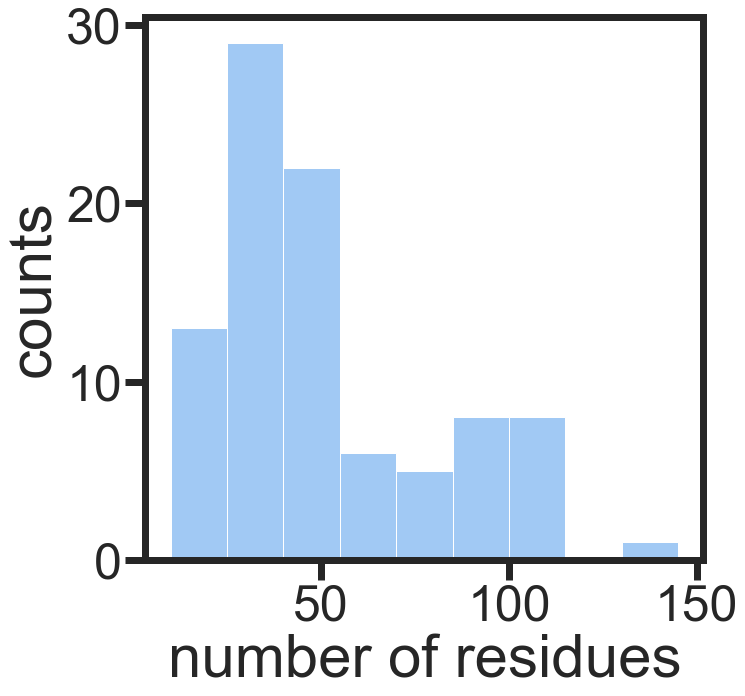

In [11]:
plt.hist(features['length'],bins=np.arange(10,160,15))
plt.xlabel('number of residues')
plt.ylabel('counts')
save_to_svg('Fig3A.svg')

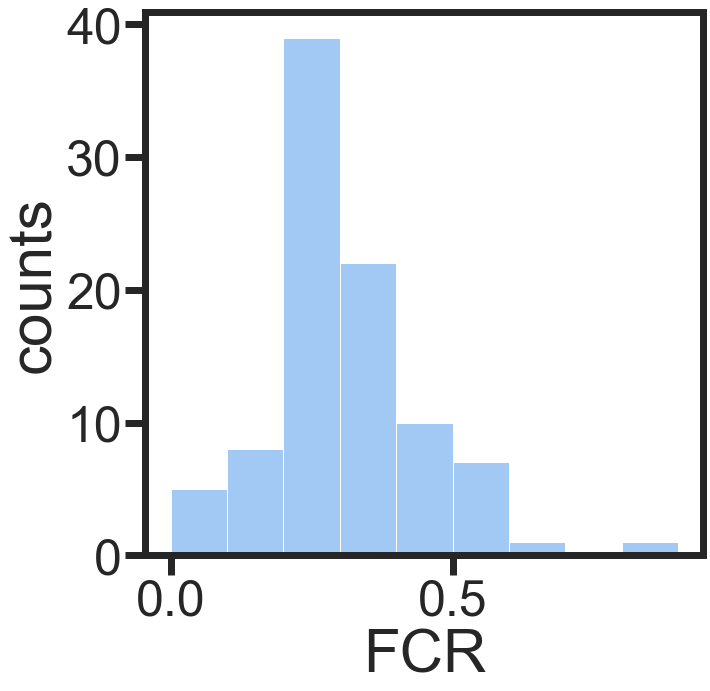

In [12]:
plt.hist(features['FCR'],bins=np.arange(0,1,0.1))
plt.xlabel('FCR')
plt.ylabel('counts')
save_to_svg('Fig3B.svg')

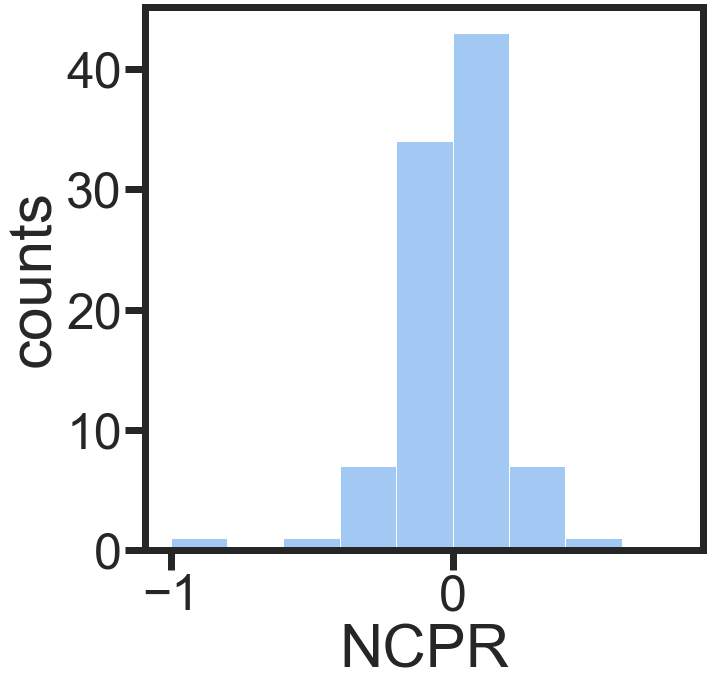

In [13]:
plt.hist(features['NCPR'],bins=np.arange(-1,1,0.2))
plt.xlabel('NCPR')
plt.ylabel('counts')
save_to_svg('Fig3C.svg')

In [14]:
def fit_function(x,a,b):
    return (a*x**(-b))
X=re_features_gs['length'].to_numpy()
y=re_features_gs['value'].to_numpy()
popt,pcov=curve_fit(fit_function,X,y)
x_pred=re_features['length'].sort_values().to_numpy()
x_pred = np.insert(x_pred,[0],[8])
print(x_pred[0])
y_pred=fit_function(x_pred, *popt)
y_pred_34=fit_function(x_pred, popt[0],-0.33)
y_pred_58=fit_function(x_pred, popt[0], -0.59)
print('fitting parameters....errors')
print(popt,np.sqrt(np.diag(pcov)))

8.0
fitting parameters....errors
[ 0.54793342 -0.48113507] [0.06106822 0.02552272]


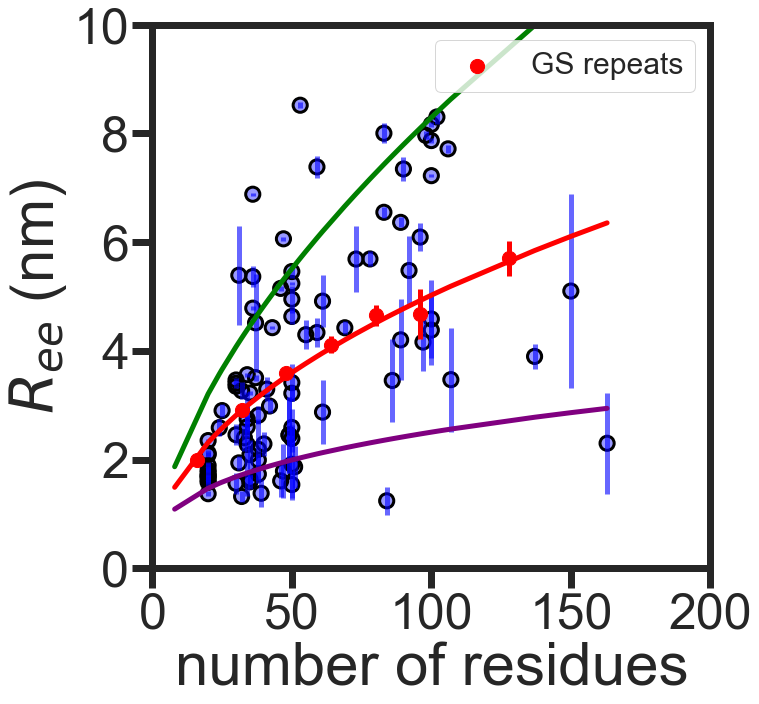

In [15]:
plt.scatter(re_features['length'], re_features['value'],s=200,c='blue',alpha=0.4)
plt.scatter(re_features['length'], re_features['value'],s=200,facecolors='none'
            ,edgecolors='black',linewidth=3)
plt.errorbar(re_features['length'], re_features['value'],yerr=re_features['Std'],ls='None',c='blue',alpha=0.6)

plt.xlim(0,200)
plt.plot(x_pred, y_pred,color='red')
plt.plot(x_pred, y_pred_34, color='purple')
plt.plot(x_pred, y_pred_58, color='green')
plt.scatter(re_features_gs['length'], re_features_gs['value'],color='red',s=200,label='GS repeats',zorder=2)
plt.errorbar(re_features_gs['length'], re_features_gs['value'], yerr=re_features_gs['Std'] ,color='red', ls='None',zorder=2)
plt.legend
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('number of residues')
plt.locator_params(axis='x',nbins=5)
plt.legend()
plt.ylim(0,10)
save_to_svg('Fig3D.svg')

## Define a function to plot heat map

In [10]:
def heatmap_omegaT(target):
    heatmap=full_df[(full_df['Protein']==target)&(full_df['prot_solv_inter']==0)].reset_index(drop=True)
    heatmap['OmegaT']=heatmap['OmegaT/OmegaU']*heatmap['frame_counts']*6
    mask=np.tril(np.ones_like(heatmap.pivot('theta', 'distance', 'OmegaT'),dtype=bool),k=-1)[:,::-1]
    ax=sns.heatmap(heatmap.pivot('theta', 'distance', 'OmegaT'),mask=mask, cmap="YlGnBu", vmin=0, vmax=90000,linewidth=5)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_ylabel('$\Omega_T$',rotation=0)
    #cbar.ax.tick_params(labelsize=60)
    plt.ylabel('angle $\\theta$ (degree)')
    plt.xlabel('distance $d$ (nm)')

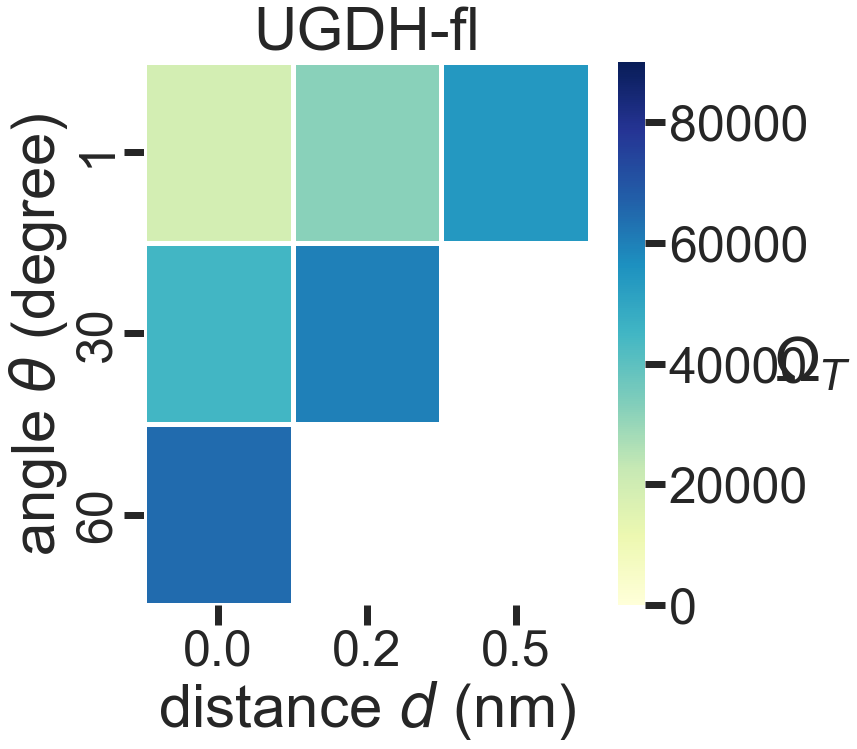

In [11]:
heatmap_omegaT('fl')
plt.title('UGDH-fl')
save_to_svg('Fig4A.svg')

## Compare UGDH with the ideal polymer

Fit GS-repeats entropic force to a ideal polymer model

$\Omega_T/\Omega_U=aN^{-b}$

Equivalent to

$\Delta S /k_b=a-bln(N)$

In [18]:
def entropy_plot_average_UGDH(x_axis,x_column='value',xlim=(0.5,4)):
    entropy_this_cell=full_df[(full_df['prot_solv_inter']==0)]
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    entropy_this_cell_NDK=full_df_NDK[(full_df_NDK['prot_solv_inter']==0)]
    subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','prot_solv_inter'])
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','prot_solv_inter'])
    subset_NDK=ref_df_NDK[ref_df_NDK['datatype']==x_axis].merge(entropy_this_cell_NDK,how='inner',on=['Protein','prot_solv_inter'])
    if x_axis=='feature':
        subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
        subset_NDK=ref_df_NDK[ref_df_NDK['datatype']==x_axis].merge(entropy_this_cell_NDK,how='inner',on=['Protein'])
    
    subset_NDK=subset_NDK.loc[~subset_NDK['Protein'].isin(['r1','r2'])]
    
    subset = subset.groupby(['Protein']).mean().sort_values(by=[x_column],ascending=True)
    subset_gs = subset_gs.groupby(['Protein']).mean().sort_values(by=[x_column],ascending=True)
    subset_NDK = subset_NDK.groupby(['Protein']).mean().sort_values(by=[x_column], ascending=True)
    x_predict=subset[x_column].to_numpy()
    x_predict=np.insert(x_predict,0,[8,10,12,14,16])
    
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='value',y_name='OmegaT/OmegaU'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    
    subset['GS_fit']=y_predict[5:]
    plt.plot(x_predict,np.log(y_predict),'r-')
    plt.scatter(x=subset.loc['DP00060',x_column],y=np.log(subset.loc['DP00060','OmegaT/OmegaU']),s=800,color='purple',label='M.PvuII',edgecolor='black',linewidth=5)
    plt.scatter(x=subset.loc['DP00974',x_column],y=np.log(subset.loc['DP00974','OmegaT/OmegaU']),s=800,color='orange',label='MOR-1',edgecolor='black',linewidth=5)
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['OmegaT/OmegaU']),color='red',s=800, label='GS Repeats',zorder=2,edgecolor='black',linewidth=5)
    plt.scatter(x=subset_NDK[x_column],y=np.log(subset_NDK['OmegaT/OmegaU']),s=800,color='grey',label='UGDH',zorder=3,edgecolor='black',linewidth=5)
    #plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.ylabel('$\Delta S/k_B$ ')
    plt.locator_params(axis='x',nbins=5)
    plt.legend(loc=3)

[]

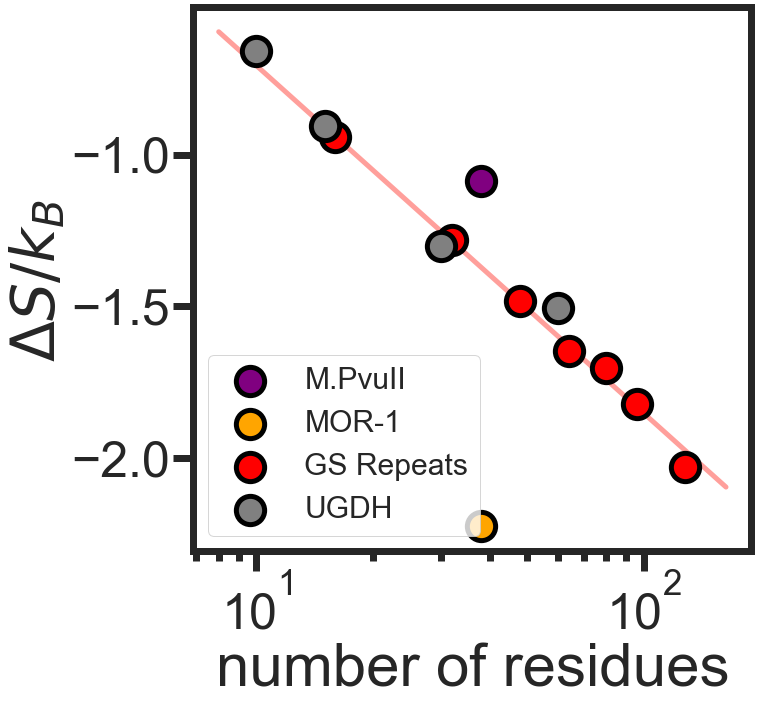

In [19]:
entropy_plot_average_UGDH('feature',x_column='length',xlim=(0, 200))
plt.xlabel('number of residues')
plt.semilogx()
#save_to_svg('Fig4B.svg')

In [20]:
def entropy_bar_puma(x_axis,x_column='value'):
    entropy_this_cell=full_df_puma[(full_df_puma['prot_solv_inter']==0)]    
    subset=ref_df_puma[ref_df_puma['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','prot_solv_inter'])
    if x_axis=='feature':
        subset=ref_df_puma[ref_df_puma['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
    subset = subset.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','prot_solv_inter'])
    if x_axis=='feature':
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
    subset_gs = subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    x_predict=subset[x_column].to_numpy()
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='value',y_name='OmegaT/OmegaU'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    print(subset.loc['puma_wildfull','OmegaT/OmegaU'])
    subset['GS_fit']=y_predict
    subset['GS_bool']=(subset['OmegaT/OmegaU']>subset['GS_fit'])
    subset_larger=subset[subset['GS_bool']==True]
    subset_smaller=subset.loc[subset['GS_bool']==False]
    sns.histplot(data=subset,x=np.log(subset['OmegaT/OmegaU']))
    plt.axvline(x=np.log(subset.loc['puma_wildfull','OmegaT/OmegaU']), color='purple', ls='--', linewidth=5, label='WT PUMA')
    plt.axvline(x=np.log(y_predict[0]),color='red', ls='--',linewidth=5,label='GS repeats')
    #plt.xlabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.xlabel('$\Delta S/k_B$')
    plt.ylabel(f'counts')
    plt.legend(loc=2)

0.16942859407196065


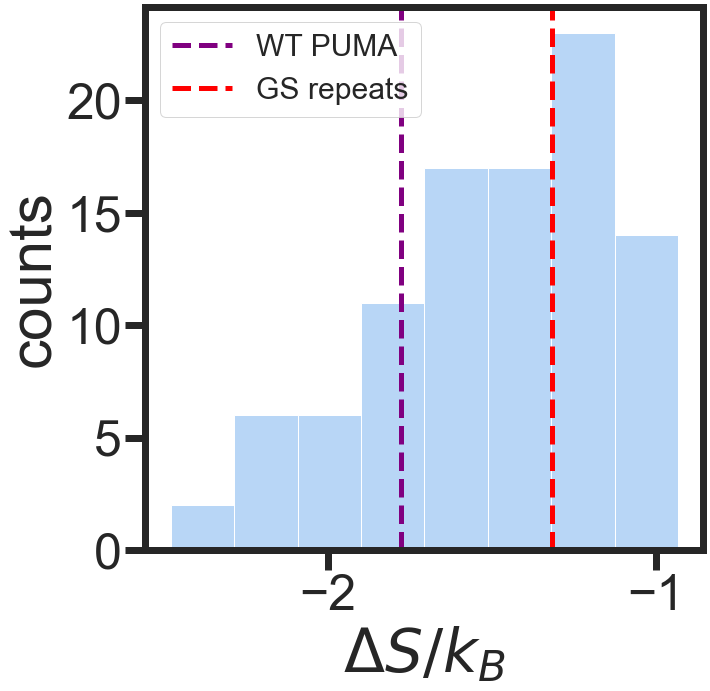

In [21]:
entropy_bar_puma('feature','length')
#save_to_svg('Fig4C.svg')

# Average the heatmap to generate scatter plot

In [22]:
def entropy_plot_average(x_axis,x_column='value',xlim=(0.5,4)):
    entropy_this_cell=full_df[(full_df['prot_solv_inter']==0)]
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','prot_solv_inter'])
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','prot_solv_inter'])
    if x_axis=='feature':
        subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
    subset = subset.groupby(['Protein']).mean()
    subset_gs = subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    x_predict=subset[x_column].to_numpy()
    
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='value',y_name='OmegaT/OmegaU'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    
    subset['GS_fit']=y_predict
    subset['GS_bool']=(subset['OmegaT/OmegaU']>subset['GS_fit'])
    #subset['GS_distance']=np.abs((subset['OmegaT/OmegaU']-subset['GS_fit']))/subset['GS_fit']
    subset['GS_distance']=(np.log(subset['OmegaT/OmegaU'])-np.log(subset['GS_fit']))/np.log(subset['GS_fit'])
    subset_larger=subset[subset['GS_bool']==True]
    subset_smaller=subset.loc[subset['GS_bool']==False]
    #print(subset.corr())
    #Weaker_force
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['OmegaT/OmegaU']),s=200,cmap='Greens_r',c=subset_larger['GS_distance'],edgecolor='black',linewidth=3,vmin=-0.5,vmax=0)
    #plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['OmegaT/OmegaU']),s=200,cmap='Greens',c=subset_larger['GS_distance'],label='Weaker force',edgecolor='black',linewidth=3)
    #Stronger_force
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['OmegaT/OmegaU']),s=200,cmap='BuPu',c=subset_smaller['GS_distance'],edgecolor='black',linewidth=3,vmin=0,vmax=0.5)
    #plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['OmegaT/OmegaU']),s=200,cmap='Blues',c=subset_smaller['GS_distance'],label='Stronger force',edgecolor='black',linewidth=3)
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['OmegaT/OmegaU']),color='red',s=200, label='GS Repeats',edgecolor='black',linewidth=3)
    plt.plot(x_predict,np.log(y_predict),color='black', ls='--',zorder=0)
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.ylabel('$\Delta S/k_B$ ')
    plt.locator_params(axis='x',nbins=5)
    plt.legend()
    return subset_larger.reset_index()[['Protein','GS_distance']], subset_smaller.reset_index()[['Protein','GS_distance']],subset

Text(0.5, 0, 'number of residues')

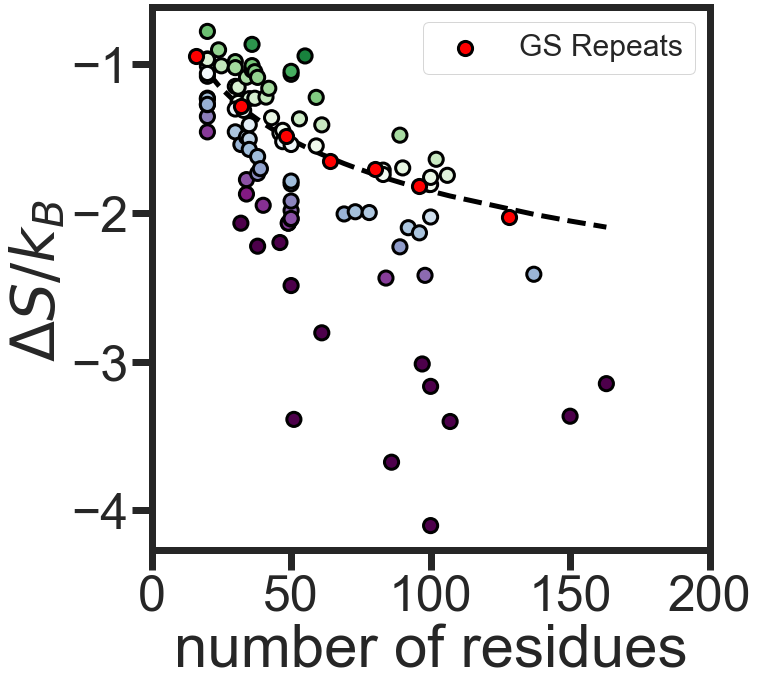

In [23]:
larger,smaller,subset=entropy_plot_average('feature',x_column='length',xlim=(0, 200))
plt.xlabel('number of residues')
#save_to_svg('Fig5A.svg')

In [24]:
subset['GS_distance'].min()

-0.3928729111781926

In [25]:
#subset['GS_distance']=(np.log(subset['OmegaT/OmegaU'])-np.log(subset['GS_fit']))/np.log(subset['GS_fit'])

In [26]:
#subset['DeltaS']=np.log(subset['OmegaT/OmegaU'])
#subset.sort_values(by=['DeltaS'])

C:\Users\small\AppData\Local\Temp/ipykernel_10116/2636669853.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar1.ax.set_yticklabels(['-0.5','-0.4','-0.3','-0.2','-0.1','0'])
C:\Users\small\AppData\Local\Temp/ipykernel_10116/2636669853.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar2.ax.set_yticklabels(['0','0.1','0.2','0.3','0.4','0.5'])


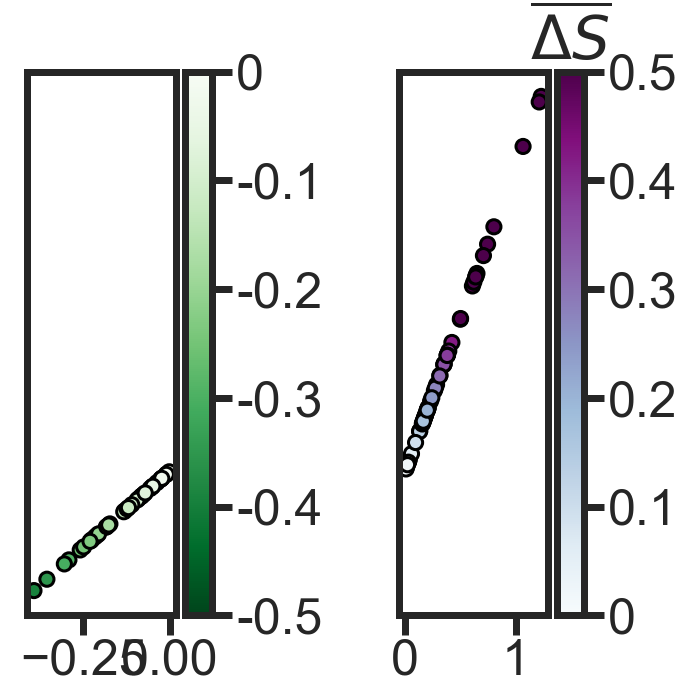

In [27]:
fig,axes=plt.subplots(1,2,sharey=True)
lf=axes[0].scatter(x=larger['GS_distance'],y=larger['GS_distance'],s=200,cmap='Greens_r',c=larger['GS_distance'],edgecolor='black',linewidth=3,vmin=-0.5,vmax=0)
sf=axes[1].scatter(x=smaller['GS_distance'],y=smaller['GS_distance'],s=200,cmap='BuPu',c=smaller['GS_distance'],edgecolor='black',linewidth=3,vmin=0,vmax=0.5)
cbar1=plt.colorbar(lf,ax=axes[0])
#cbar1.ax.set_yticklabels(['0%','-20%','-40%','-60%','-80%','-100%'][::-1])
cbar1.ax.set_yticklabels(['-0.5','-0.4','-0.3','-0.2','-0.1','0'])
axes[0].set_yticks([])
cbar2=plt.colorbar(sf,ax=axes[1])
cbar2.ax.set_yticklabels(['0','0.1','0.2','0.3','0.4','0.5'])
cbar2.ax.set_title('$\overline{\Delta S}$')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
#save_to_svg('Fig5_cbar.svg')

## Normalize End-to-end distance

In [28]:
ref_df.loc[ref_df['datatype']=='feature','GS_Chi']=0.55*ref_df.loc[ref_df['datatype']=='feature','length']**0.48
a=ref_df.loc[ref_df['datatype']=='feature']
b=ref_df.loc[(ref_df['datatype']=='ee') & (ref_df['prot_solv_inter']==0)]
c=b.merge(a,on='Protein', how='inner')
c['Chi']=(c['value_x']/c['GS_Chi_y'])-1

In [29]:
ref_df_gs.loc[ref_df_gs['datatype']=='feature','GS_Chi']=0.55*ref_df_gs.loc[ref_df_gs['datatype']=='feature','length']**0.48
a_gs=ref_df_gs.loc[ref_df_gs['datatype']=='feature']
b_gs=ref_df_gs.loc[(ref_df_gs['datatype']=='ee') & (ref_df_gs['prot_solv_inter']==0)]
c_gs=b_gs.merge(a_gs,on='Protein', how='inner')
c_gs['Chi']=(c_gs['value_x']/c_gs['GS_Chi_y'])-1

In [30]:
def entropy_plot_chi_average(x_column='Chi',xlim=(-1.1,1.1)):
    entropy_this_cell=full_df[(full_df['prot_solv_inter']==0)]
    subset=c.merge(entropy_this_cell, on='Protein', how='inner')
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    subset_gs=c_gs.merge(entropy_this_cell_gs,how='inner',on='Protein')
    subset_gs=subset_gs.groupby(['Protein']).mean()
    print(subset_gs)
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset_larger=subset.merge(larger,how='inner',on='Protein')
    subset_smaller=subset.merge(smaller,how='inner',on='Protein')
    subset_larger = subset_larger.groupby(['Protein']).mean()
    subset_smaller = subset_smaller.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    plt.axvline(x=0,color='black', ls='--',zorder=0)
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['OmegaT/OmegaU']),s=200,cmap='Greens_r',c=subset_larger['GS_distance'],label='Weaker force',edgecolor='black',linewidth=3,vmin=-0.5,vmax=0)
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['OmegaT/OmegaU']),s=200,cmap='BuPu',c=subset_smaller['GS_distance'],label='Stronger force',edgecolor='black',linewidth=3,vmin=0, vmax=0.5)
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['OmegaT/OmegaU']),s=200,color='red',label='GS Repeats',edgecolor='black',linewidth=3)
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$')
    plt.ylabel('$\Delta S/k_B$ ')
    plt.locator_params(axis='x', nbins=5)

         prot_solv_inter_x   value_x     Std_x  frame_counts_x  length_x  \
Protein                                                                    
GS16                   0.0  2.914744  0.025926         28000.0       NaN   
GS24                   0.0  3.597450  0.042596         28000.0       NaN   
GS32                   0.0  4.114931  0.162544         28000.0       NaN   
GS40                   0.0  4.650516  0.193890         28040.0       NaN   
GS48                   0.0  4.682540  0.456141         28045.0       NaN   
GS64                   0.0  5.699591  0.314515         28000.0       NaN   
GS8                    0.0  1.985934  0.006048         28000.0       NaN   

         kappa_x  FCR_x  NCPR_x  Hydrophobicity_x  Expanding_x  ...  \
Protein                                                         ...   
GS16         NaN    NaN     NaN               NaN          NaN  ...   
GS24         NaN    NaN     NaN               NaN          NaN  ...   
GS32         NaN    NaN     NaN

(-4.5, -0.5)

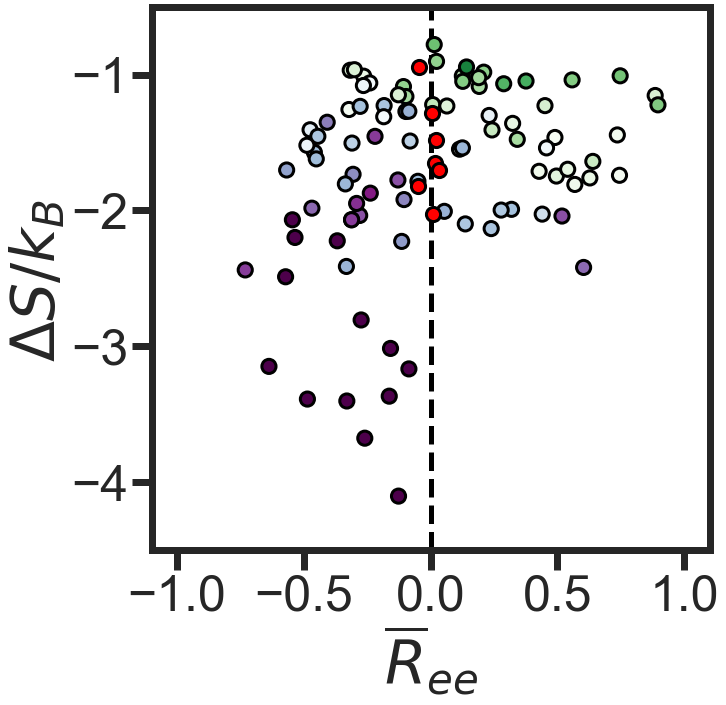

In [31]:
entropy_plot_chi_average()
plt.xlabel(r'$\overline{R}_{ee}$')
plt.ylim(-4.5,-0.5)
#save_to_svg('Fig5B.svg')

## Ensemble change with solution condition UGDH

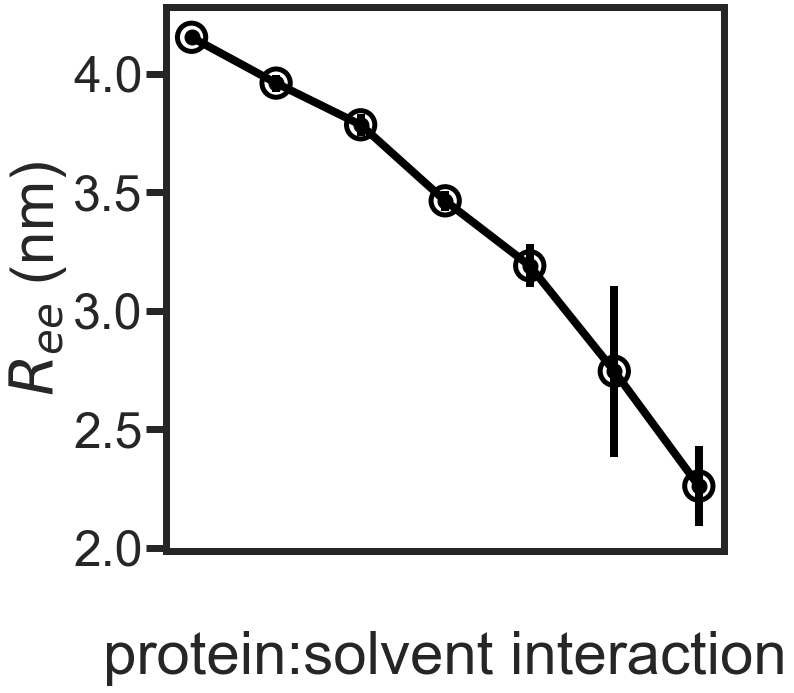

In [34]:
so_plot=ref_df[(ref_df['Protein']=='fl') & (ref_df['datatype']=='ee') ].sort_values(by=['prot_solv_inter'])
plt.errorbar(x=so_plot['prot_solv_inter'], y=so_plot['value'], yerr=so_plot['Std'],linewidth=8,marker='.',ms=30, color='black')
plt.scatter(x=so_plot['prot_solv_inter'],y=so_plot['value'],color='black',s=800,edgecolor='black',linewidth=5,zorder=3,facecolors='none')
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('protein:solvent interaction')
plt.locator_params(axis='y', nbins=5)
ax=plt.gca()
ax.set_xticks([])
ax.invert_xaxis()
ax.xaxis.labelpad = 80
save_to_svg('Fig6A.svg')

## End-to-end distance change with the solution condition change

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

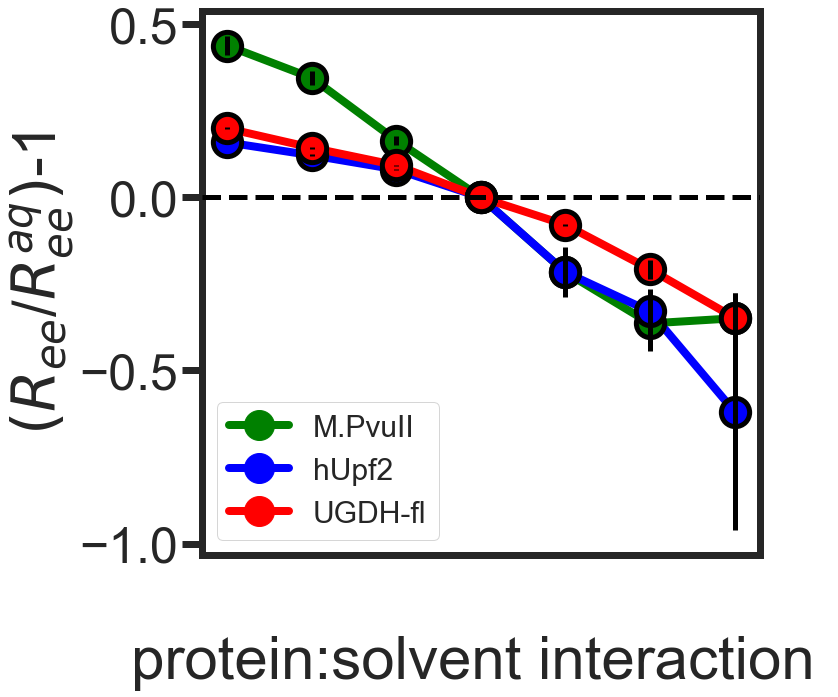

In [53]:
grouped_ref=ref_df[(ref_df['prot_solv_inter'] != 0.5) & (ref_df['prot_solv_inter'] != -0.5) & (ref_df['datatype'] == 'ee')].groupby(['Protein'])
target_list=['fl','DP00060','DP00949']
color_list=['red','green','blue']
label_list=['UGDH-fl','M.PvuII','hUpf2']
for key in grouped_ref.groups.keys():
    plot_data=grouped_ref.get_group(key).sort_values(by=['prot_solv_inter'])
    plot_data['normalized_Rs']=plot_data['value']/plot_data[plot_data['prot_solv_inter']==0.0]['value'].values-1
    plot_data['normalized_Sd']=plot_data['normalized_Rs']*np.sqrt(
        (plot_data['Std']/plot_data['value'])**2+
        (plot_data[plot_data['prot_solv_inter']==0.0]['Std'].values/plot_data[plot_data['prot_solv_inter']==0.0]['value'].values)**2)
    #print(plot_data)
    if plot_data[plot_data['prot_solv_inter']==-3.0]['normalized_Rs'].values<-2:
        print(key,plot_data[plot_data['prot_solv_inter']==-3.0]['normalized_Rs'])
    if key in target_list:
        if key=='fl':
            plot_data_target=plot_data
        color=color_list[target_list.index(key)]
        label=label_list[target_list.index(key)]
        plt.plot(plot_data['prot_solv_inter'],plot_data['normalized_Rs'],'-o',label=label,color=color,linewidth=8,ms=30,zorder=2)
        plt.errorbar(x=plot_data['prot_solv_inter'],y=plot_data['normalized_Rs'],yerr=plot_data['normalized_Sd'],linestyle='',color='black',zorder=4)
        plt.scatter(x=plot_data['prot_solv_inter'],y=plot_data['normalized_Rs'],color=color,s=800,edgecolor='black',linewidth=5,zorder=3)
    else:
        color='grey'
        #plt.plot(plot_data['prot_solv_inter'],plot_data['normalized_Omega2/Omega1'],'-',color=color, linewidth=2, alpha=0.7)
    #plt.ylim(-0.5,1)
    plt.ylabel(r'$(R_{ee}$/$R_{ee}^{aq})$-1')
    plt.xlabel('protein:solvent interaction ')
    plt.legend(loc=3)
    plt.locator_params(axis='y', nbins=5)
plt.axhline(0,linestyle='--',zorder=4,color='black')
ax=plt.gca()
ax.invert_xaxis()
ax.set_xticks([])
ax.xaxis.labelpad = 80
#save_to_svg('Fig6C.svg')
## End-to-end distance change with the solution condition change

In [55]:
plot_data_target['normalized_Sd']/plot_data_target['normalized_Rs']

0    0.075856
1    0.132455
2    0.031184
3         NaN
4    0.017270
5    0.015347
6    0.013580
dtype: float64

In [56]:
plot_data_target['Std']/plot_data_target['value']

0    0.074829
1    0.131870
2    0.028597
3    0.012436
4    0.011983
5    0.008993
6    0.005454
dtype: float64

## Entropic force change with the solution condition change

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

DP00055 126   -2.672317
Name: normalized_Omega2/Omega1, dtype: float64
DP00949 427   -2.117826
Name: normalized_Omega2/Omega1, dtype: float64


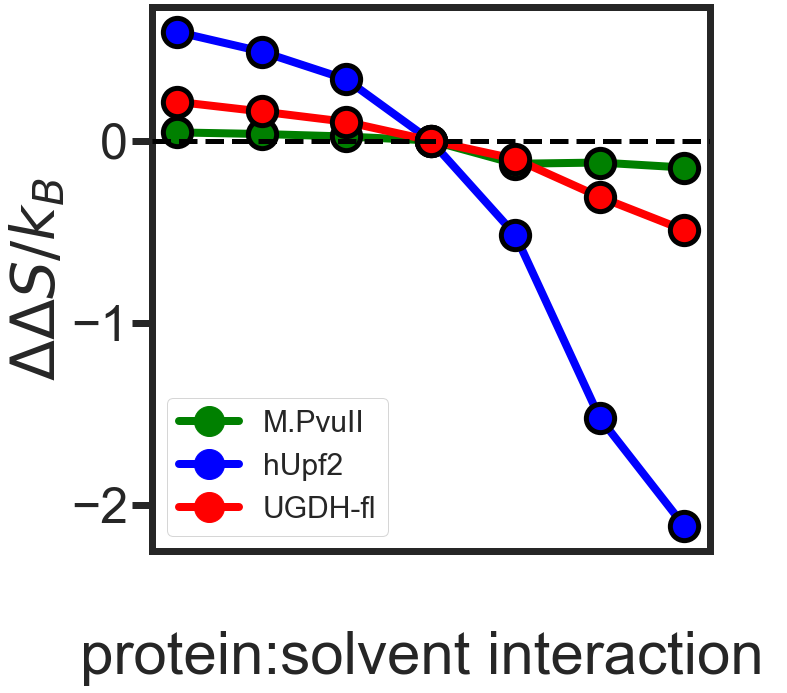

In [36]:
group_test=full_df[(full_df['prot_solv_inter'] != 0.5) & (full_df['prot_solv_inter'] != -0.5) ].groupby(['Protein','prot_solv_inter'])
group_test_df=group_test.mean().reset_index().drop(columns=['distance','theta','frame_counts'])
grouped=group_test_df.groupby(['Protein'])
target_list=['fl','DP00060','DP00949']
color_list=['red','green','blue']
label_list=['UGDH-fl','M.PvuII','hUpf2']
for key in grouped.groups.keys():
    plot_data=grouped.get_group(key).sort_values(by=['prot_solv_inter'])
    plot_data['normalized_Omega2/Omega1']=np.log(plot_data['OmegaT/OmegaU']/plot_data[plot_data['prot_solv_inter']==0.0]['OmegaT/OmegaU'].values)
    if plot_data[plot_data['prot_solv_inter']==-3.0]['normalized_Omega2/Omega1'].values<-2:
        print(key,plot_data[plot_data['prot_solv_inter']==-3.0]['normalized_Omega2/Omega1'])
    if key in target_list:
        color=color_list[target_list.index(key)]
        label=label_list[target_list.index(key)]
        plt.plot(plot_data['prot_solv_inter'],plot_data['normalized_Omega2/Omega1'],'-o',label=label,color=color,linewidth=8,ms=30,zorder=2)
        plt.scatter(x=plot_data['prot_solv_inter'],y=plot_data['normalized_Omega2/Omega1'],color=color,s=800,edgecolor='black',linewidth=5,zorder=3)
    else:
        color='grey'
    #plt.ylabel(f'$\Delta$ln($\Omega_T/\Omega_U$)')
    plt.ylabel('$\Delta \Delta S/k_B$')
    plt.xlabel('protein:solvent interaction ')
    plt.legend(loc=3)
    plt.locator_params(axis='y', nbins=5)
plt.axhline(0,linestyle='--',zorder=4,color='black')
ax=plt.gca()
ax.invert_xaxis()
ax.set_xticks([])
ax.xaxis.labelpad = 80
#save_to_svg('Fig6D.svg')

## Entropic force change for every IDR

In [37]:
list_all=[]
for key in grouped.groups.keys():
    plot_data=grouped.get_group(key).sort_values(by=['prot_solv_inter'])
    plot_data['normalized_Omega2/Omega1']=np.log(plot_data['OmegaT/OmegaU']/plot_data[plot_data['prot_solv_inter']==0.0]['OmegaT/OmegaU'].values)
    #plot_data['normalized_Omega2/Omega1']=np.log(plot_data['OmegaT/OmegaU'])/np.log(plot_data[plot_data['prot_solv_inter']==0.0]['OmegaT/OmegaU'].values)-1
    list_all.append(plot_data)
df_all=pd.concat(list_all)

In [38]:
order=df_all['prot_solv_inter'].unique()
print(order)
df_median=df_all.groupby('prot_solv_inter').median().sort_index(ascending=True)
df_median

[-3. -2. -1.  0.  1.  2.  3.]


,OmegaT/OmegaU,normalized_Omega2/Omega1
prot_solv_inter,,
-3.0,0.130501,-0.277162
-2.0,0.162254,-0.167271
-1.0,0.189799,-0.077799
0.0,0.214541,0.000000
1.0,0.234088,0.051923
2.0,0.256963,0.098714
3.0,0.264503,0.136245


In [39]:
subset_color=subset.reset_index()[['Protein','GS_bool','GS_distance']]
df_color=df_all.merge(subset_color,on='Protein',how='inner')
df_color_weaker=df_color[df_color['GS_bool']]
df_color_stronger=df_color[~df_color['GS_bool']]

In [40]:
#color_map=sns.color_palette("PRGn_r",n_colors=20)
#save_to_svg('Fig6B_cbar.png')

[ 3.  2.  1.  0. -1. -2. -3.]


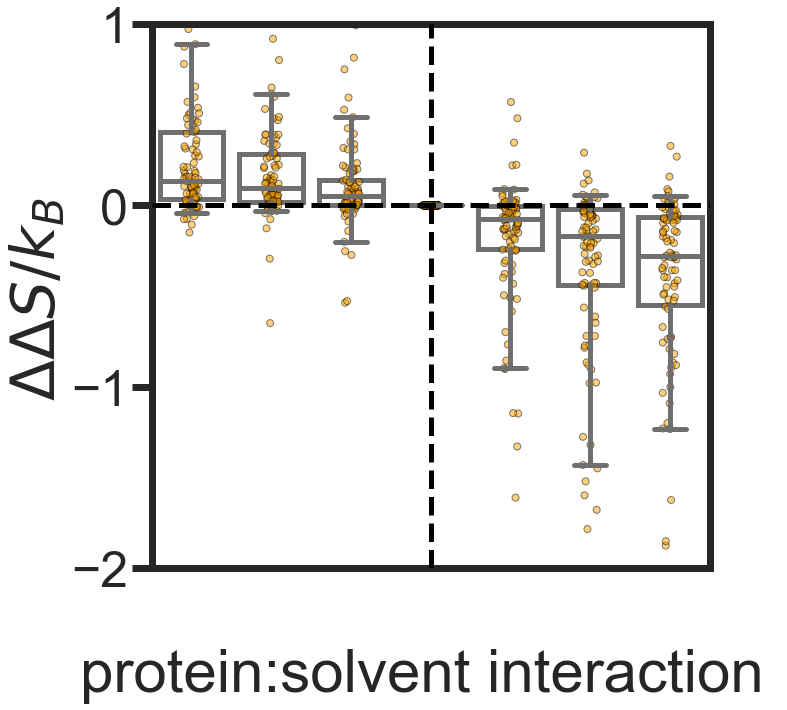

In [41]:
df_all=df_all.sort_values(by=['prot_solv_inter'],ascending=False)
order=df_all['prot_solv_inter'].unique()
print(order)
ax=sns.boxplot(y='normalized_Omega2/Omega1',x='prot_solv_inter', data=df_all, showfliers = False,zorder=3,whis=[5, 95])
#ax2=sns.stripplot(y='normalized_Omega2/Omega1',x='prot_solv_inter', data=df_color_weaker,hue='GS_distance',palette='Greens_r',alpha=1,zorder=1,s=7,edgecolor='black',linewidth=1,jitter=0.15)
#ax3=sns.stripplot(y='normalized_Omega2/Omega1',x='prot_solv_inter', data=df_color_stronger,hue='GS_distance',palette='BuPu',alpha=1,zorder=1,s=7,edgecolor='black',linewidth=1,jitter=0.15)
ax2=sns.stripplot(y='normalized_Omega2/Omega1',x='prot_solv_inter', data=df_color,color='orange',alpha=0.5,zorder=1,s=7,edgecolor='black',linewidth=1)
#ax3=plt.scatter((df_median.index)+3,df_median['normalized_Omega2/Omega1'],s=800,zorder=1,color='black',alpha=0.4)
ax.invert_xaxis()
for patch in ax.patches:
    fc = patch.get_facecolor()
    patch.set_facecolor(mpl.colors.to_rgba(fc,0.01))
ax2.set_xticks([])
ax2.xaxis.labelpad = 80
#plt.ylabel(f'$\Delta$ln($\Omega_T/\Omega_U$)')
plt.ylabel('$\Delta \Delta S/k_B$ ')
plt.xlabel('protein:solvent interaction ')
plt.ylim(-2,1)
plt.axvline(x=3, color='black', ls='--',linewidth=5,zorder=4)
plt.axhline(y=0, color='black', ls='--',linewidth=5,zorder=4)
#save_to_svg('Fig6B.svg')

## GS repeats  homopolymer scaling law 

In [42]:
gs_buffer=ref_df_gs[(ref_df_gs['datatype']=='ee') & (ref_df_gs['prot_solv_inter']==0)].dropna(axis=1).sort_values(by=['value'])
gs_buffer=gs_buffer.merge(ref_df_gs[ref_df_gs['datatype']=='feature'].dropna(axis=1),on='Protein')
gs_buffer

,Protein,datatype_x,prot_solv_inter,value,Std,frame_counts,datatype_y,Sequence,length,kappa,FCR,NCPR,Hydrophobicity,Expanding,delta,GS_Chi
0,GS8,ee,0.0,1.985934,0.006048,28000.0,feature,GSGSGSGSGSGSGSGS,16.0,-1.0,0.0,0.0,3.9,0.0,0.0,2.081327
1,GS16,ee,0.0,2.914744,0.025926,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS,32.0,-1.0,0.0,0.0,3.9,0.0,0.0,2.902917
2,GS24,ee,0.0,3.597450,0.042596,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS,48.0,-1.0,0.0,0.0,3.9,0.0,0.0,3.526619
3,GS32,ee,0.0,4.114931,0.162544,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,64.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.048826
4,GS40,ee,0.0,4.650516,0.193890,28040.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,80.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.506568
5,GS48,ee,0.0,4.682540,0.456141,28045.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,96.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.918729
6,GS64,ee,0.0,5.699591,0.314515,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,128.0,-1.0,0.0,0.0,3.9,0.0,0.0,5.647074


In [43]:
def fit_function(x,a,b):
    return (a*x**(-b)) 
X=gs_buffer['length'].to_numpy()
y=gs_buffer['value'].to_numpy()
popt,pcov=curve_fit(fit_function,X,y)
y_pred=fit_function(X, *popt)
print(popt)

[ 0.54793342 -0.48113507]


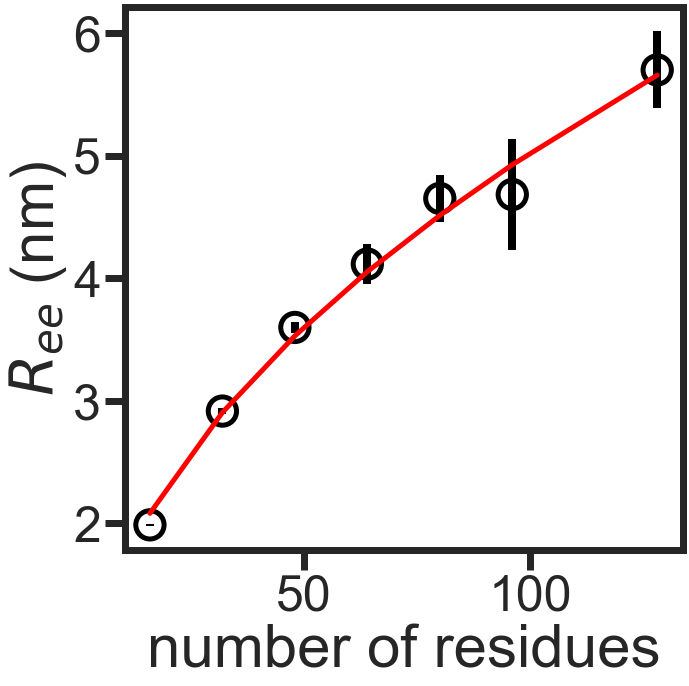

In [44]:
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('number of residues')
plt.scatter(x=gs_buffer['length'], y=gs_buffer['value'], s=800,facecolors='none',color='black',linewidth=5)
plt.errorbar(x=gs_buffer['length'], y=gs_buffer['value'], yerr=gs_buffer['Std'],linewidth=8,ls='',ms=30, color='black')
plt.plot(X, y_pred,color='red')
#plt.title('$R_{ee}=0.55N^{0.48}$')
save_to_svg('FigS1.svg')

In [45]:
def entropy_plot_SI(x_axis,x_column='value',xlim=(0.5,4)):
    entropy_this_cell=full_df[(full_df['prot_solv_inter']==0)]
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','prot_solv_inter'])
    if x_axis=='feature':
        subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
    if subset[subset[x_column]>1].empty:
        print('No unusual kappa')
    else:
        print(subset[subset[x_column]>1])
        subset.loc[subset[x_column]>1,x_column]=='Nan'
    subset_larger=subset.merge(larger,how='inner',on='Protein')
    subset_smaller=subset.merge(smaller,how='inner',on='Protein')
    subset_larger = subset_larger.groupby(['Protein']).mean()
    subset_smaller = subset_smaller.groupby(['Protein']).mean()
    subset['DS/k']=np.log(subset['OmegaT/OmegaU'])
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['OmegaT/OmegaU']),s=200,cmap='Greens_r',c=subset_larger['GS_distance'],label='Weaker force',edgecolor='black',linewidth=3,vmin=-0.5,vmax=0)
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['OmegaT/OmegaU']),s=200,cmap='BuPu',c=subset_smaller['GS_distance'],label='Stronger force',edgecolor='black',linewidth=3,vmin=0,vmax=0.5)
    #plt.scatter(x=subset[x_column],y=subset['DS/k'],color='black',s=200, label='Disprot')
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.ylabel('$\Delta S/k_B$ ')
    plt.locator_params(axis='x',nbins=5)
    print('Pearson Corr: {:.2f}'.format(subset.corr().loc[x_column,'DS/k']))
    return subset.corr().loc[x_column,'DS/k']

No unusual kappa
Pearson Corr: 0.11


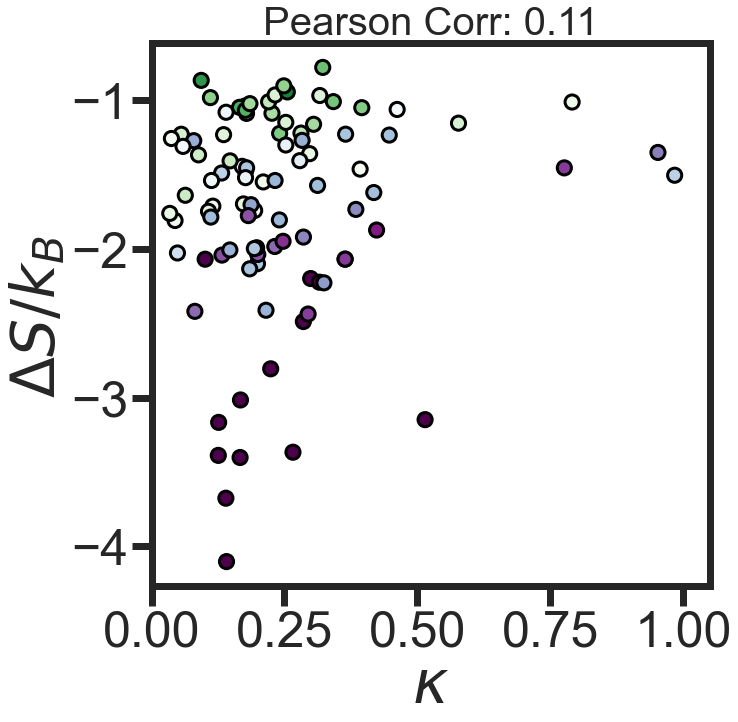

In [46]:
pearson_corr=entropy_plot_SI('feature',x_column='kappa',xlim=(0, 1.05))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('$\kappa$')
save_to_svg('FigS2-1.svg')

No unusual kappa
Pearson Corr: 0.24


Text(0.5, 0, 'FCR')

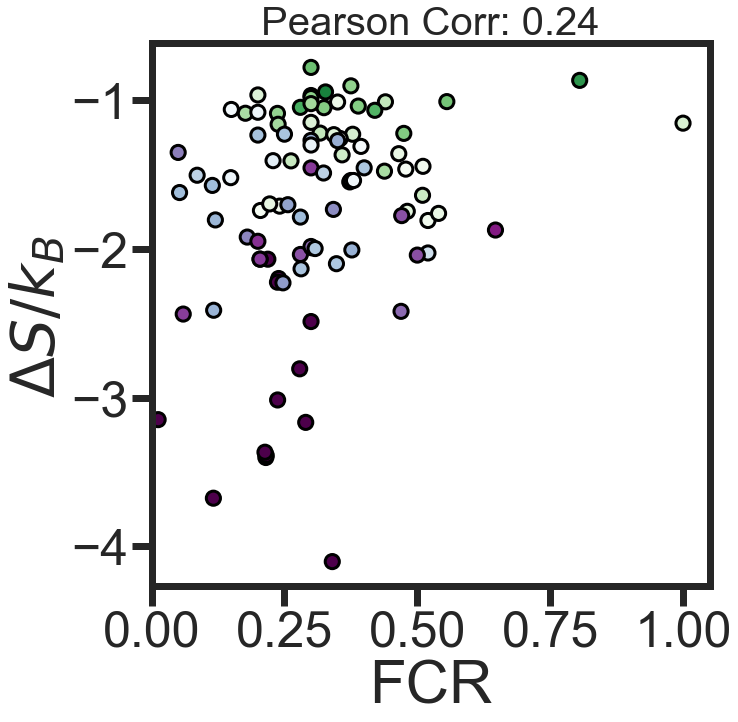

In [47]:
pearson_corr=entropy_plot_SI('feature',x_column='FCR',xlim=(0, 1.05))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('FCR')
#save_to_svg('FigS2-2.svg')

No unusual kappa
Pearson Corr: 0.11


Text(0.5, 0, 'NCPR')

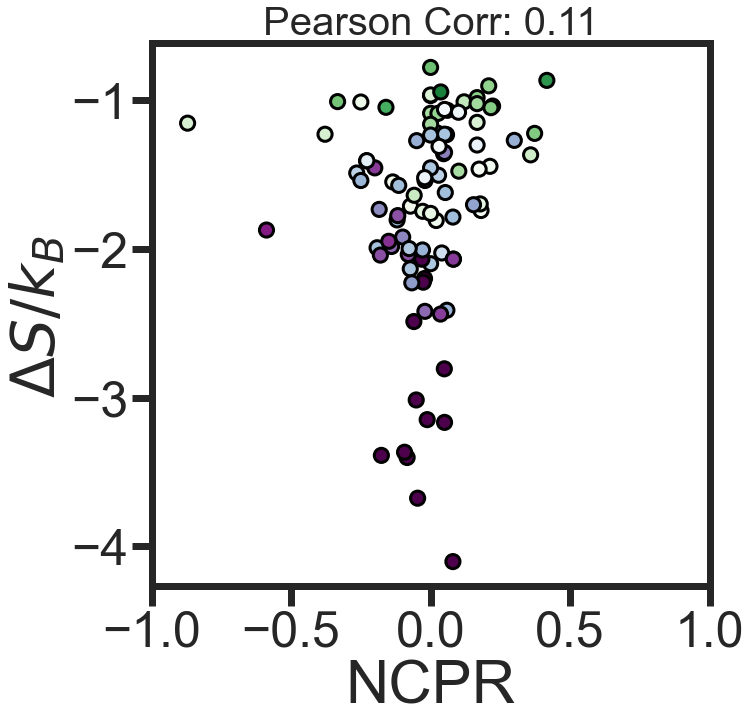

In [48]:
pearson_corr=entropy_plot_SI('feature',x_column='NCPR',xlim=(-1, 1))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('NCPR')
#save_to_svg('FigS2-3.svg')

    Protein datatype  prot_solv_inter_x  value  Std  frame_counts_x  \
396   A1LCD  feature                NaN    NaN  NaN             NaN   
397   A1LCD  feature                NaN    NaN  NaN             NaN   
398   A1LCD  feature                NaN    NaN  NaN             NaN   
399   A1LCD  feature                NaN    NaN  NaN             NaN   
400   A1LCD  feature                NaN    NaN  NaN             NaN   
401   A1LCD  feature                NaN    NaN  NaN             NaN   

                                              Sequence  length    kappa  \
396  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...   137.0  0.21527   
397  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...   137.0  0.21527   
398  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...   137.0  0.21527   
399  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...   137.0  0.21527   
400  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...   137.0  0.21527   
401  GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG.

Text(0.5, 0, 'Cluster_ILVAM')

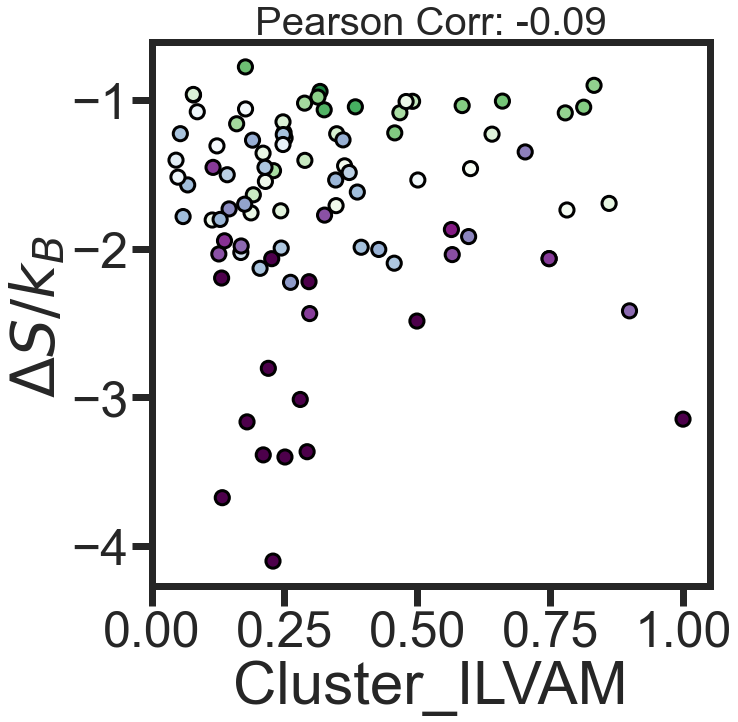

In [49]:
pearson_corr=entropy_plot_SI('feature',x_column='kappa_IL',xlim=(0, 1.05))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('Cluster_ILVAM')
#save_to_svg('FigS2-4.svg')

In [ ]:
pearson_corr=entropy_plot_SI('feature',x_column='kappa_QN',xlim=(0, 1.05))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('Cluster_QNSTH')
#save_to_svg('FigS2-5.svg')

In [ ]:
pearson_corr=entropy_plot_SI('feature',x_column='kappa_YF',xlim=(0, 1.05))
fig=plt.gcf()
plt.title('Pearson Corr: {:.2f}'.format(pearson_corr), fontsize=40)
plt.xlabel('Cluster_YFW')
#save_to_svg('FigS2-6.svg')

## Entropic force correlated with the asphericity

In [ ]:
##This one return the dataset of GS linker
def entropy_plot_asphericity(x_column,xlim=(-1.1,1.1)):
    ensemble=ref_df.loc[(ref_df['datatype']=='asphericity') & (ref_df['prot_solv_inter']==0)].dropna(axis=1).merge(c[['Protein','Chi']],on='Protein', how='inner')
    ensemble_gs=ref_df_gs.loc[(ref_df_gs['datatype']=='asphericity') & (ref_df_gs['prot_solv_inter']==0)].dropna(axis=1).merge(c_gs[['Protein','Chi']],on='Protein', how='inner')
    entropy_this_cell=full_df[(full_df['prot_solv_inter']==0)]
    subset=ensemble.merge(entropy_this_cell, on='Protein', how='inner')
    entropy_this_cell_gs=full_df_gs[(full_df_gs['prot_solv_inter']==0)]
    subset_gs=ensemble_gs.merge(entropy_this_cell_gs,how='inner',on='Protein')
    subset_gs=subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset_larger=subset.merge(larger,how='inner',on='Protein')
    subset_smaller=subset.merge(smaller,how='inner',on='Protein')
    subset_larger = subset_larger.groupby(['Protein']).mean()
    subset_smaller = subset_smaller.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['OmegaT/OmegaU']),s=200,cmap='Greens_r',c=subset_larger['GS_distance'],label='Weaker force',edgecolor='black',linewidth=3,vmin=-0.5,vmax=0)
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['OmegaT/OmegaU']),s=200,cmap='BuPu',c=subset_smaller['GS_distance'],label='Stronger force',edgecolor='black',linewidth=3,vmin=0, vmax=0.5)
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['OmegaT/OmegaU']),s=200,color='red',label='GS Repeats',edgecolor='black',linewidth=3)
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$')
    plt.ylabel('$\Delta S/k_B$')
    plt.locator_params(axis='x', nbins=5)
    return subset_gs

In [ ]:
subset_gs=entropy_plot_asphericity(x_column='value',xlim=(0,1))

def fit_function(x,a):
    return (0.000000001*x + a)
    
x = subset_gs['OmegaT/OmegaU'].to_numpy()
y = subset_gs['value'].to_numpy()
popt,pcov=curve_fit(fit_function, x, y)
print(popt)
    
plt.axvline(x=popt[0],color='black', ls='--',zorder=0)
plt.xlabel('$\delta$')
plt.ylim(-4.5,-0.5)
save_to_svg('FigS4.svg')

## Average GS asphericity

In [ ]:
subset_gs=subset_gs.reset_index()
subset_gs['length']=subset_gs['Protein'].str.extract('(\d+)').astype(int)*2
subset_gs.sort_values(by=['length'],inplace=True)
plt.scatter(x='length',y='value',data=subset_gs, s=800,facecolors='none',color='black',linewidth=5)
plt.errorbar(x='length',y='value',yerr='Std',data=subset_gs,linewidth=8,ls='',ms=30,color='black')
plt.axhline(y=subset_gs.describe().loc['mean','value'],color='red',linestyle='--')
print('Average {:.2f}'.format(subset_gs.describe().loc['mean','value']))
print('Standard Deviation {:.2f}'.format(subset_gs.describe().loc['std','value']))
plt.ylim(0.2,0.6)
plt.ylabel('$\delta$')
plt.xlabel('number of residues')
save_to_svg('FigS3.svg')

In [ ]:
subset_gs.describe()